In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # used for loading datasets

In our last topic, we learned how to use `plt.plot()` to plot data in the x and y-axis.
* We will study more examples within this topic.
  * However we will not study these examples in detail, such as setting and customising plot parameters, like title, axis, grid, colour. We will leave such details until the next topic.
  * However, there will be cases in this topic where we will introduce a little customisation to present the examples better

* We will study the following plot types in this topic:
  * Line Plot
  * Histogram
  * Boxplot
  * Scatter Plot
  * Areaplot
  * Bar plot
  * Pie chart
  * 3D Plot
  * Images

* The matplotlib gallery with documented use cases can be found [here](https://matplotlib.org/stable/gallery/index.html)

In [3]:
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## Line Plot

In the previous topic, we showed an example using `plt.plot() ` with NumPy array data. Matplotlib handles data structure either with NumPy or Pandas. The next example will consider Pandas.
  * Consider the `flights` dataset

In [5]:
df = pd.read_csv('UK_MacroData.csv').head(32)
print(df.shape)
df.head()

(32, 5)


,Date,GDP (£ m),CPI,Bank Rate,Gross Fixed Capital Formation (Investments)
0,2000 Q1,401242,1.1,5.875,69114.0
1,2000 Q2,404196,1.0,6.000,73074.0
2,2000 Q3,406795,1.2,6.000,68011.0
3,2000 Q4,409411,1.4,6.000,70115.0
4,2001 Q1,413054,1.3,5.750,70186.0


In [6]:
df['year'] = df['Date'].str[:4]
df['quarter'] = df['Date'].str[-2:]
df['Date'] = pd.to_datetime(df['year'] + '-' + df['quarter'] )
df.set_index('Date',inplace=True)
df.head()

/var/folders/2h/2zcs8h612kxcwf4_nb9dj5dm0000gn/T/ipykernel_31426/1902054566.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['year'] + '-' + df['quarter'] )


,GDP (£ m),CPI,Bank Rate,Gross Fixed Capital Formation (Investments),year,quarter
Date,,,,,,
2000-01-01,401242,1.1,5.875,69114.0,2000,Q1
2000-04-01,404196,1.0,6.000,73074.0,2000,Q2
2000-07-01,406795,1.2,6.000,68011.0,2000,Q3
2000-10-01,409411,1.4,6.000,70115.0,2000,Q4
2001-01-01,413054,1.3,5.750,70186.0,2001,Q1


We plot the Investments' value. The x-axis, when not stated explicitly, is the index.

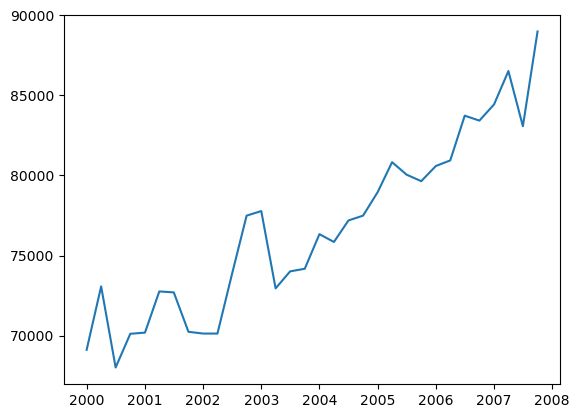

In [8]:
plt.plot(df['Gross Fixed Capital Formation (Investments)'])
plt.show()

We plot the Investments' value. The x-axis, when not stated explicitly, is the index.

Using `plt.plot()`, we subset both variables.
  * In this case bracket notation was used, but you could use any approach you learned so far (like `.filter()`).
  * Run this code and you will see GDP plotted on the same chart as the Investments data. 

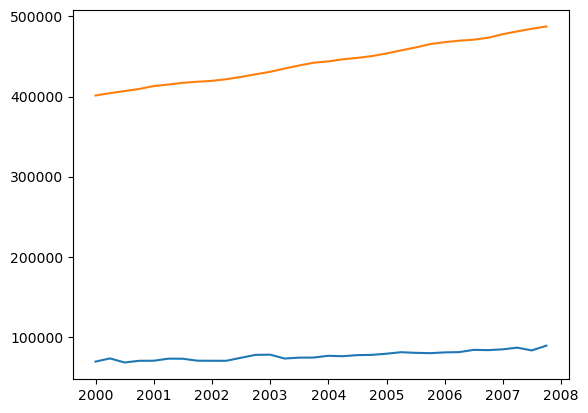

In [10]:
plt.plot(df[['Gross Fixed Capital Formation (Investments)','GDP (£ m)']])
plt.show()

## Histograms

We use `plt.hist()` to plot histograms in Matplotlib. The documentation can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
* A histogram is a bar graph where the bar height on the y-axis is a count of occurrences in the data of the classes on the horizontal axis. 
* Sometimes, the data is said to be ordered into buckets along the x-axis. 
* Let's consider the Online_Retail dataset. It has records of transactions made by customers through an online retail platform. The dataset includes data on the products that were purchased, the quantity of each product, the date and time of each transaction, the price of each product, the unique identifier for each customer who made a purchase, and the country where each customer is located.

In [24]:
df = pd.read_csv('OnlineRetail.csv')
df = df.sample(n=50, random_state=9)
df.head(3)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 79782: invalid start byte

* In `plt.hist()` you will parse the following arguments:
  * `data`, which is, in this case, the DataFrame. It could be your array
  * `x`, which is the variable
  * `bins`, which are the buckets where your data will be grouped

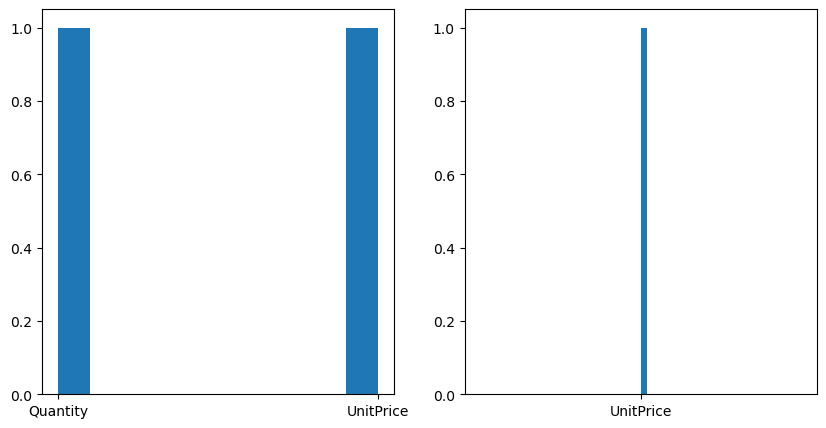

In [65]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axes[0].hist(data=df, x='Quantity')
axes[1].hist(data=df, x='UnitPrice', bins=50)
plt.show()

From this plot, you can easily see the most commonly occurring `UnitPrice` for these sale transactions. The UnitPrice values have been bucketed into fifty bins. 
In a case where you want to plot multiple variables within a Matplotlib histogram, you can loop over your variables using `plt.hist()`
* Then you add `plt.legend()`, so a legend is added to the Figure. The function documentation is found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)
* Finally, you plot the Figure with `plt.show()`

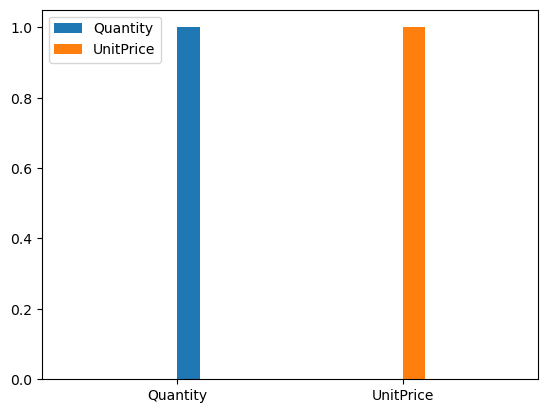

In [41]:
for col in ['Quantity','UnitPrice']:
  plt.hist(data=df,x=col,label=col)
plt.legend()
plt.show()

## Box Plot

A boxplot is a useful chart to show the distribution or spread of data visually. It is sometimes known as a box and whisker plot. The box extends from the first to the third quartile with the centre line showing the median. The whiskers' overall length is 1.5 times longer than the box. The circles show any data outside the whiskers and are called fliers or outliers. Do not worry about what any of these terms mean as you will learn about statistics in an upcoming lesson.

In [ ]:
df = pd.read_csv('Online_Retail.csv')
df = df.sample(n=50, random_state=9)
df.head(3)

We will use `plt.boxplot()`. The documentation can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)
* The arguments are data, where you parse the dataset, and x, where you inform the variable you want the boxplot.

In [ ]:
plt.boxplot(data=df,x='UnitPrice')
plt.show()

You can use `plt.xticks()` to set the ticks on the x-axis. The documentation is found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html)
* In the cell below, we are plotting multiple variables; we set them in a list col_boxplot.
* In a loop, we append the content of each variable to another list. This list will be used to plot the data in a boxplot.
* Finally we set the variables name in the x axis with `plt.xticks()` 

In [ ]:
list_of_data = []
col_boxplot = ['Quantity','UnitPrice']
for col in col_boxplot:
  list_of_data.append(df[col])

plt.boxplot(x=list_of_data)
plt.xticks(np.arange(1,len(col_boxplot)+1), col_boxplot)
plt.show()

At first, this code may look too difficult to plot a boxplot using multiple variables. And you are right; there are alternative ways to do this task. The idea here is to present the numerous existing alternatives when deciding to pick your tool for a particular use case in the workplace.

 What the above plot tells us about the Online_Retail transactions data is that UnitPrice is tightly distributed about the 0-10 range, but Quantity varies a lot and is skewed towards the high end of its distribution. 

## Scatter Plot

A scatter plot is one that uses dots to plot two different numeric variables. They are useful to see if there is a relationship between two variables. In the above plot, you can see that a transaction with a higher price tends to be smaller in terms of quantity.

In [ ]:
df = pd.read_csv('Online_Retail.csv')
df = df.sample(n=50, random_state=9)
df.head()

We use `plt.scatter()` to plot a scatter plot in Matplotlib. The documentation is found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

Let's plot a scattor plot setting `kind='scatter'`, `x='UnitPrice'` and `y='Quantity'`

In [ ]:
x, y = 'UnitPrice' , 'Quantity'
plt.scatter(data=df, x=x, y=y)
plt.ylabel(y)
plt.xlabel(x)
plt.show()

You can add the parameter **`c`**, for **colouring** the plot based on another variable. The colourmap options are found [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html). In this case, we set `c='Quantity'`

In [ ]:
x, y = 'UnitPrice' , 'Quantity'
plt.scatter(data=df, x=x, y=y, c=y)
plt.ylabel(y)
plt.xlabel(x)
plt.show()

Noe we added the parameter **`s`**, for **size**. The dots' size will be defined according to `Quantity` levels.

In [ ]:
x, y = 'UnitPrice' , 'Quantity'
plt.scatter(data=df, x=x, y=y, c=y, s=y)
plt.ylabel(y)
plt.xlabel(x)
plt.show()

You can rescale the dot's size. If you parse `s=y*10`, the code will not work, since it is a string (y) multiplied by a number. In this case, you should parse the array df[y], then multiply by a number for scaling. (In case of huge dot size we can use dividing operation for scaling).

In [ ]:
x, y = 'UnitPrice' , 'Quantity'
plt.scatter(data=df, x=x, y=y, c=y, s=df[y]*10)
plt.ylabel(y)
plt.xlabel(x)
plt.show()

In [61]:
df_practice = sns.load_dataset('tips')
df_practice = df_practice.sample(n=50, random_state=1)
df_practice.head(10)

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
243,18.78,3.00,Female,No,Thur,Dinner,2
206,26.59,3.41,Male,Yes,Sat,Dinner,3
122,14.26,2.50,Male,No,Thur,Lunch,2
89,21.16,3.00,Male,No,Thur,Lunch,2
218,7.74,1.44,Male,Yes,Sat,Dinner,2
58,11.24,1.76,Male,Yes,Sat,Dinner,2
186,20.90,3.50,Female,Yes,Sun,Dinner,3
177,14.48,2.00,Male,Yes,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0.5, 0, 'total_bill')

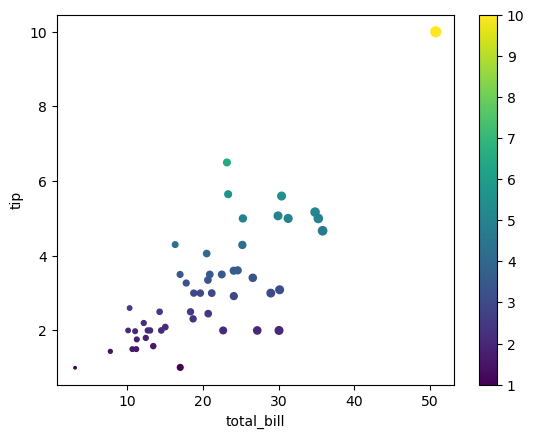

In [63]:
x, y = 'total_bill','tip'
plt.scatter (data=df_practice, x=x, y=y, c=y, s=x)
plt.colorbar()
plt.ylabel(y)
plt.xlabel(x)

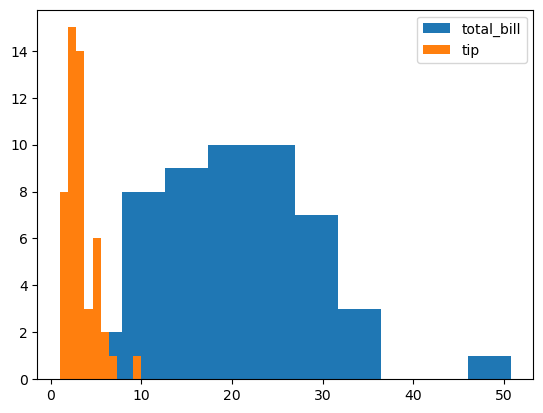

In [67]:
for col in ['total_bill','tip']:
    plt.hist(data=df_practice, x=col, label=col, bins=10)
plt.legend()
plt.show()